In [1]:
import pandas as pd 
from pandas.plotting import table
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from datetime import date 
import math

# configurations
# this script is applicatble only for ring-molecules
NUM_CARBON = 8

# Read data from file 
date_computed = str(date.today())
file_path = os.path.join(".", "output", date_computed + "_trajectory_internal_geometry" + ".csv")

In [2]:
# # Plot histogram to observe distribution
# data = pd.read_csv(file_path)

# # angles 21 - 28 

# # [-2:]

In [ ]:
# # plot C-C bonds
# # data.iloc[:,1:9]
# # range=(1, 2)
# C_C_df = data.iloc[:,1:9]
# fig, axes = plt.subplots(ncols=len(C_C_df.columns), figsize=(35,4))
# fig.suptitle('C-C Bond histograms', size=16) 

# for col, axe in zip(C_C_df.columns, axes):
#         x = C_C_df[col]
#         axe.hist(x, bins=50, range=(1, 2), histtype='step', label=col)
#         axe.set_xlabel(col)
#         axe.set_ylabel('freq')
#         axe.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
#         axe.set_ybound(lower=0,upper=35)
#         ymin,ymax=axe.get_ylim()
#         axe.text(x.mean()*1.05, ymax*0.9,'Mean: {:.2f}'.format(x.mean()))
        
# #------------------------- Output to file ----------------------#
# output_path = os.path.join(".", "visuals","histograms", date_computed + "_C_C_IC_value" + ".png")
# os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visuals' & 'histograms' folder if not existed yet
# plt.savefig(output_path)

In [ ]:
# # Plot how each IC varies (w.r.t. traj#)
# sub_data = data.iloc[:,1:] # slice off first column (TRAJ #)
# sub_data.plot(kind="line", subplots=True, layout=(6, 6), figsize=(20, 20), sharex=False, title="Value vs Traj");
# #------------------------- Output to file ----------------------#
# output_path = os.path.join(".", "visuals", date_computed + "_hop21_IC_value_variations" + ".png")
# os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visual' folder if not existed yet
# plt.savefig(output_path)

In [3]:
# --------------- Graph showing correlation between initial structure vs. structure at twist -------------# 
# Read data from file 
date_computed = str(date.today())
file_path_1 = os.path.join(".", "output", date_computed + "_trajectory_internal_geometry" + ".csv")
file_path_2 = os.path.join(".", "output", date_computed + "_hop21_internal_geometry" + ".csv")
initial_data = pd.read_csv(file_path_1)
hop_data = pd.read_csv(file_path_2)

# ----------------------- Merge & filter ----------------------- #
dih_merge = pd.merge(initial_data.iloc[:,:], \
                         hop_data.iloc[:,:], \
                         suffixes=('_initial','_hop'), on='TRAJ')
dih_merge

,TRAJ,C1-C2_initial,C2-C3_initial,C3-C4_initial,C4-C5_initial,C5-C6_initial,C6-C7_initial,C7-C8_initial,C8-C1_initial,C6-H9_initial,...,C8-C1-C2_hop,C1-C2-C3_hop,C2-C3-C4_hop,C3-C4-C5_hop,C4-C5-C6_hop,C5-C6-C7_hop,C6-C7-C8_hop,C7-C8-C1_hop,dih H9-C6-C7-H10_hop,dih H11-C8-C1-H12_hop
0,1,1.551258,1.543911,1.531626,1.527116,1.552446,1.309488,1.560361,1.377899,1.155043,...,94.568604,104.943347,112.750725,110.831169,121.706558,123.831875,132.252418,142.345562,12.424763,3.878215
1,2,1.624694,1.423730,1.591606,1.415098,1.492492,1.354036,1.541507,1.390989,1.340262,...,109.245014,117.343442,100.821193,110.042908,122.095922,121.325454,125.516305,48.310413,57.351251,35.329940
2,3,1.375906,1.669311,1.430011,1.704897,1.489961,1.160705,1.365853,1.299753,1.015286,...,133.829951,117.968494,114.606803,124.286194,116.205514,97.545708,121.332736,99.349678,45.941388,23.913621
3,4,1.539765,1.566836,1.599801,1.498411,1.459443,1.497698,1.512974,1.402658,1.070488,...,101.150916,126.125279,120.122060,118.312759,116.394272,125.281570,124.873536,137.403814,12.968548,156.101760
4,5,1.486953,1.496991,1.531832,1.639940,1.432684,1.380659,1.395032,1.268993,1.015244,...,114.891599,136.924618,113.443244,124.701930,115.329548,126.239314,110.415049,66.878497,2.960237,45.045958
5,6,1.469516,1.505247,1.610460,1.530644,1.626067,1.231416,1.318607,1.338935,1.237416,...,120.311218,112.352027,104.158549,114.136866,114.681292,128.703069,132.147027,122.139642,107.568865,31.750423
6,7,1.594837,1.640486,1.515766,1.543036,1.487552,1.228055,1.448206,1.383908,0.975817,...,119.118052,119.257615,109.860200,113.830186,119.697608,116.799417,135.719053,119.315396,103.172643,35.352587
7,8,1.506852,1.517146,1.524982,1.462864,1.529643,1.396865,1.665317,1.392470,1.152370,...,129.699276,107.904405,117.628794,114.035095,127.337666,136.203046,84.246527,115.358620,40.715976,2.038013
8,9,1.497733,1.612219,1.545596,1.680513,1.305381,1.533169,1.518610,1.363372,1.002496,...,121.105445,113.649978,126.095102,107.317953,118.571122,138.559507,99.951815,118.261510,44.798787,0.873679
9,10,1.467000,1.599578,1.456819,1.584304,1.504641,1.295011,1.449205,1.444573,1.015234,...,130.068843,130.256886,114.533151,109.650160,114.791491,110.649186,88.200068,145.163527,48.768053,20.542058


In [4]:
C_C_df = dih_merge.iloc[:,51:-2]
C_C_df

,C8-C1-C2_hop,C1-C2-C3_hop,C2-C3-C4_hop,C3-C4-C5_hop,C4-C5-C6_hop,C5-C6-C7_hop,C6-C7-C8_hop,C7-C8-C1_hop
0,94.568604,104.943347,112.750725,110.831169,121.706558,123.831875,132.252418,142.345562
1,109.245014,117.343442,100.821193,110.042908,122.095922,121.325454,125.516305,48.310413
2,133.829951,117.968494,114.606803,124.286194,116.205514,97.545708,121.332736,99.349678
3,101.150916,126.125279,120.122060,118.312759,116.394272,125.281570,124.873536,137.403814
4,114.891599,136.924618,113.443244,124.701930,115.329548,126.239314,110.415049,66.878497
5,120.311218,112.352027,104.158549,114.136866,114.681292,128.703069,132.147027,122.139642
6,119.118052,119.257615,109.860200,113.830186,119.697608,116.799417,135.719053,119.315396
7,129.699276,107.904405,117.628794,114.035095,127.337666,136.203046,84.246527,115.358620
8,121.105445,113.649978,126.095102,107.317953,118.571122,138.559507,99.951815,118.261510
9,130.068843,130.256886,114.533151,109.650160,114.791491,110.649186,88.200068,145.163527


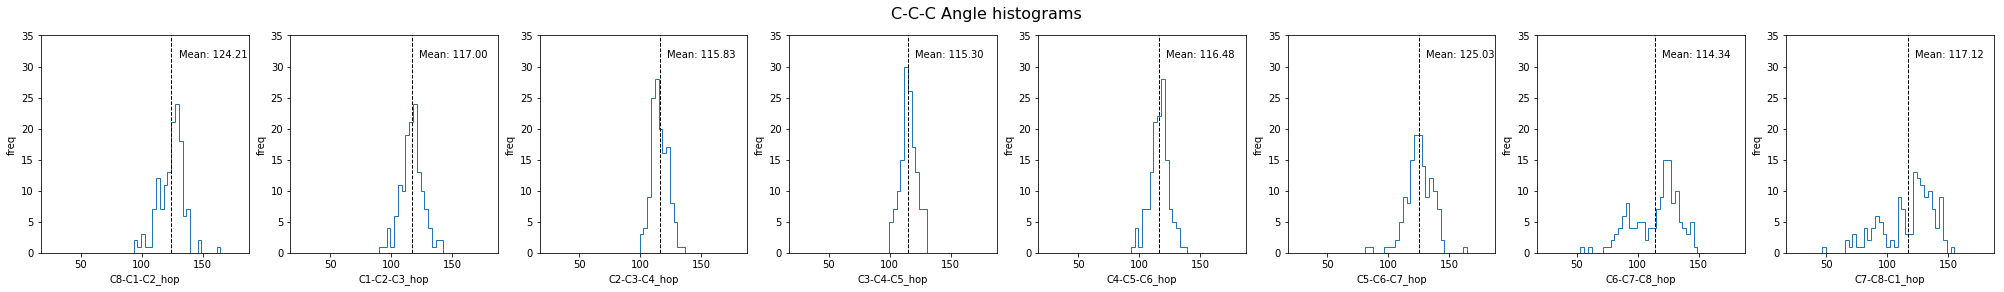

In [5]:
# plot histrograms for C-C bonds
# data.iloc[:,1:9]
# range=(1, 2)
C_C_df = dih_merge.iloc[:,51:-2]
fig, axes = plt.subplots(ncols=len(C_C_df.columns), figsize=(35,4))
fig.suptitle('C-C-C Angle histograms', size=16) 

for col, axe in zip(C_C_df.columns, axes):
        x = C_C_df[col]
        axe.hist(x, bins=50, range=(25,180), histtype='step', label=col)
        axe.set_xlabel(col)
        axe.set_ylabel('freq')
        axe.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
        axe.set_ybound(lower=0,upper=35)
        ymin,ymax=axe.get_ylim()
        axe.text(x.mean()*1.05, ymax*0.9,'Mean: {:.2f}'.format(x.mean()))
        
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals","histograms", date_computed + "_C_C_C_angle_IC_value" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visuals' & 'histograms' folder if not existed yet
plt.savefig(output_path)

In [6]:
# ------------------- Compute mean for dihedrals ----------------- #
split_index = math.ceil(len(dih_merge.columns)/2)
mean_initial = dih_merge.iloc[:,1:split_index].mean(axis=0).rename('initial').to_frame() 
mean_hop = dih_merge.iloc[:,split_index:].mean(axis=0).rename('hop').to_frame() 
mean_initial.set_axis(hop_data.columns[1:], axis=0, inplace=True)
mean_hop.set_axis(hop_data.columns[1:], axis=0, inplace=True)

# Merge
compare_mean = pd.concat([mean_initial, mean_hop], axis=1, sort=False).reset_index()                                           # axis{0/’index’, 1/’columns’},

# Strip all cols with C-H bonds
compare_mean.drop(range(8,20), axis=0, inplace=True)

compare_mean.index = range(len(compare_mean))

display(compare_mean[-2:])

,index,initial,hop
16,dih H9-C6-C7-H10,7.504124,49.029071
17,dih H11-C8-C1-H12,10.743849,45.512307


In [2]:
# ----------------------- Plot ----------------------- #
# plt.subplot(121) nrows, ncols, and index
figure_nrows = math.ceil(len(compare_mean)/2)
figure_ncols = 2
plt.figure(figsize=(10,10*figure_nrows))

# -------------- C-C bonds range(1,8) --------------
C_C_stop=NUM_CARBON
for col, axe_index in zip(compare_mean['index'][0:C_C_stop], range(1,C_C_stop+1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(1,2)
    plt.ylim(1,2)
    axe_index+=1

# -------------- C-C-C angles range(20,28) --------------
for col, axe_index in zip(compare_mean['index'][C_C_stop:-2], range(C_C_stop+1,len(compare_mean)-1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(50,200)
    plt.ylim(10,200)
    axe_index+=1

# -------------- dihedrals rang(29,31) --------------
for col, axe_index in zip(compare_mean['index'][-2:], range(len(compare_mean)-1,len(compare_mean)+1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(0,90)
    plt.ylim(0,180)
    axe_index+=1
    
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals", "initial_vs_hop", date_computed + "_initial_vs_hop" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create folder if not existed yet
plt.savefig(output_path)

NameError: name 'math' is not defined

In [1]:
dih_angle_df = dih_merge.iloc[:,-2:]
lower_bound = 0
upper_bound = 90
dih_angle_df_filtered_1 = dih_angle_df[(dih_angle_df['dih H9-C6-C7-H10_hop']>=lower_bound ) & (dih_angle_df['dih H9-C6-C7-H10_hop']<=upper_bound)]
print(len(dih_angle_df_filtered_1)/len(dih_angle_df) * 100)

dih_angle_df_filtered_2 = dih_angle_df[(dih_angle_df['dih H11-C8-C1-H12_hop']>=lower_bound ) & (dih_angle_df['dih H11-C8-C1-H12_hop']<=upper_bound)]
print(len(dih_angle_df_filtered_2)/len(dih_angle_df) * 100)

NameError: name 'dih_merge' is not defined

In [241]:
# Mini notes:
'''
should turn hop vs initial into a loop, do for all ICs -- see that repetition :))

reorganize suplots by modifying figure, not by reshaping axes
python doesnt have a++
'''
# Reference: 
'''
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_axis.html  --- to rename
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
https://matplotlib.org/api/axes_api.html#ticks-and-tick-labels
'''

'\nshould turn hop vs initial into a loop, do for all ICs -- see that repetition :))\n\nreorganize suplots by modifying figure, not by reshaping axes\npython doesnt have a++\n'